# Regression

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import math
import statsmodels.api as sms
import statsmodels.formula.api as smf

%matplotlib inline

from scipy import stats

In [2]:
df = pd.read_csv("data/df_clean.csv")
df.head()

,Unnamed: 0,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_l_price
0,0,141013,221900.0,3.0,1.00,1180,5650,1.0,0,0,...,1180,0.0,1955,141013,98178,47.5112,-122.257,1340,5650,188.05
1,1,141209,538000.0,3.0,2.25,2570,7242,2.0,0,0,...,2170,400.0,1951,141209,98125,47.7210,-122.319,1690,7639,209.34
2,2,150225,180000.0,2.0,1.00,770,10000,1.0,0,0,...,770,0.0,1933,150225,98028,47.7379,-122.233,2720,8062,233.77
3,3,141209,604000.0,4.0,3.00,1960,5000,1.0,0,0,...,1050,910.0,1965,141209,98136,47.5208,-122.393,1360,5000,308.16
4,4,150218,510000.0,3.0,2.00,1680,8080,1.0,0,0,...,1680,0.0,1987,150218,98074,47.6168,-122.045,1800,7503,303.57


In [3]:
# drop columns
df.drop("Unnamed: 0", inplace=True, axis=1)
df.drop("date", inplace=True, axis=1)

In [4]:
round(df.describe(),2)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_l_price
count,21597.00,21595.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00
mean,540296.57,3.37,2.12,2080.32,15099.41,1.49,0.01,0.23,3.41,7.66,1788.60,285.72,1971.00,143902.70,98077.95,47.56,-122.21,1986.62,12758.28,264.14
std,367368.14,0.90,0.77,918.11,41412.64,0.54,0.08,0.76,0.65,1.17,827.76,439.82,29.38,4436.65,53.51,0.14,0.14,685.23,27274.44,110.00
min,78000.00,1.00,0.50,370.00,520.00,1.00,0.00,0.00,1.00,3.00,370.00,0.00,1900.00,140502.00,98001.00,47.16,-122.52,399.00,651.00,87.59
25%,322000.00,3.00,1.75,1430.00,5040.00,1.00,0.00,0.00,3.00,7.00,1190.00,0.00,1951.00,140722.00,98033.00,47.47,-122.33,1490.00,5100.00,182.29
50%,450000.00,3.00,2.25,1910.00,7618.00,1.50,0.00,0.00,3.00,7.00,1560.00,0.00,1975.00,141016.00,98065.00,47.57,-122.23,1840.00,7620.00,244.64
75%,645000.00,4.00,2.50,2550.00,10685.00,2.00,0.00,0.00,4.00,8.00,2210.00,550.00,1997.00,150217.00,98118.00,47.68,-122.12,2360.00,10083.00,318.33
max,7700000.00,10.00,8.00,13540.00,1651359.00,3.50,1.00,4.00,5.00,13.00,9410.00,4820.00,2015.00,150527.00,98199.00,47.78,-121.32,6210.00,871200.00,810.14


## Categorise and edit features

In [5]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'sqft_l_price'],
      dtype='object')

In [6]:
df["price_log"]=np.log(df.price)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_l_price,price_log
0,221900.0,3.0,1.00,1180,5650,1.0,0,0,3,7,...,0.0,1955,141013,98178,47.5112,-122.257,1340,5650,188.05,12.309982
1,538000.0,3.0,2.25,2570,7242,2.0,0,0,3,7,...,400.0,1951,141209,98125,47.7210,-122.319,1690,7639,209.34,13.195614
2,180000.0,2.0,1.00,770,10000,1.0,0,0,3,6,...,0.0,1933,150225,98028,47.7379,-122.233,2720,8062,233.77,12.100712
3,604000.0,4.0,3.00,1960,5000,1.0,0,0,5,7,...,910.0,1965,141209,98136,47.5208,-122.393,1360,5000,308.16,13.311329
4,510000.0,3.0,2.00,1680,8080,1.0,0,0,3,8,...,0.0,1987,150218,98074,47.6168,-122.045,1800,7503,303.57,13.142166


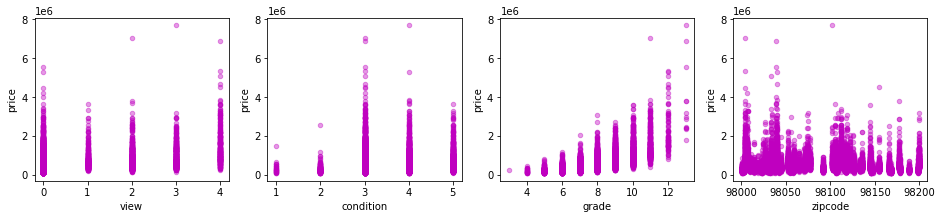

In [7]:
#categorial features1
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,3))

for xcol, ax in zip(['view', 'condition', 'grade', 'zipcode'], axes):
    df.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='m')
    
plt.savefig('figures/categorial-features1.png')

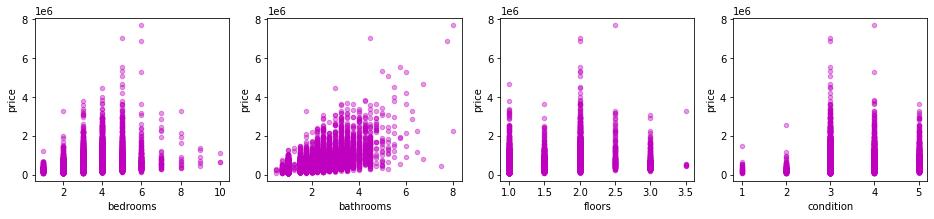

In [8]:
#categorial features2
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,3))

for xcol, ax in zip(['bedrooms', 'bathrooms', 'floors', 'condition'], axes):
    df.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='m')
    
plt.savefig('figures/categorial-features2.png')

In [9]:
categorical_var = ["waterfront",
                   "condition",
                   "grade",
                   "zipcode",
                   'bedrooms',
                   'bathrooms',
                   'floors',
                   'view']

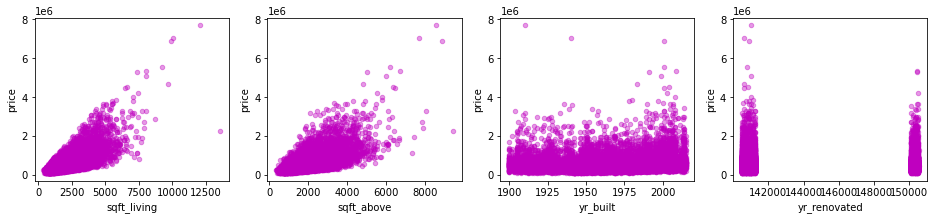

In [10]:
#contineus var1
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,3))

for xcol, ax in zip(['sqft_living', 'sqft_above', 'yr_built', 'yr_renovated'], axes):
    df.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='m')
    
plt.savefig('figures/continues-feature1.png')

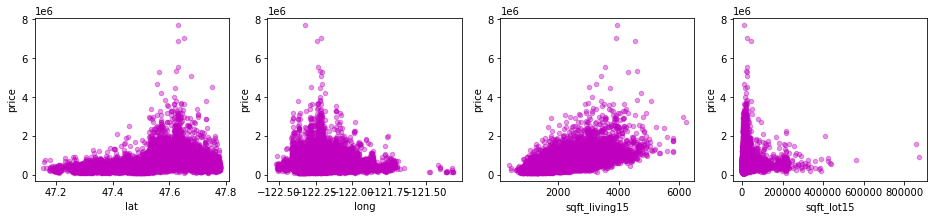

In [11]:
#contineus var2
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,3))

for xcol, ax in zip(['lat', 'long', 'sqft_living15', 'sqft_lot15'], axes):
    df.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='m')
    
plt.savefig('figures/continues-feature2.png')

In [12]:
continuous_var = ['price',
                  'sqft_living',
                  'sqft_lot',
                  'sqft_above',
                  'sqft_basement',
                  'yr_built',
                  'yr_renovated',
                  'lat',
                  'long',
                  'sqft_living15',
                  'sqft_lot15',
                  "sqft_l_price",
                  "price_log"]

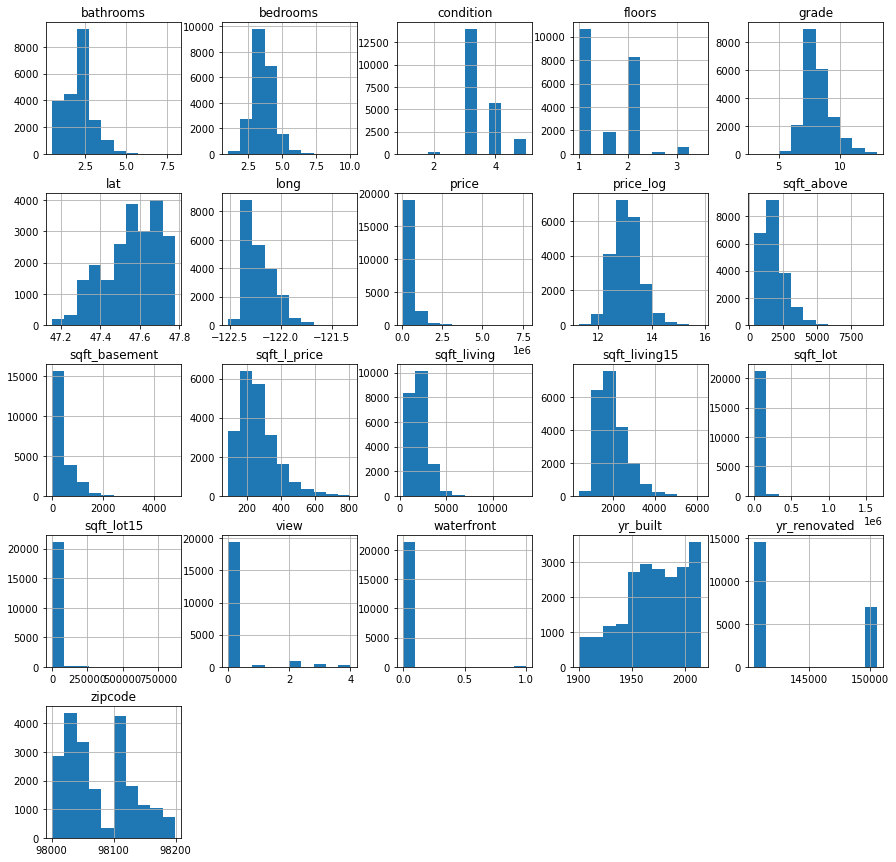

In [13]:
import warnings
warnings.filterwarnings('ignore')
fig = plt.figure(figsize = (15,15))
ax = fig.gca()
df.hist(ax = ax);

## Correlogram

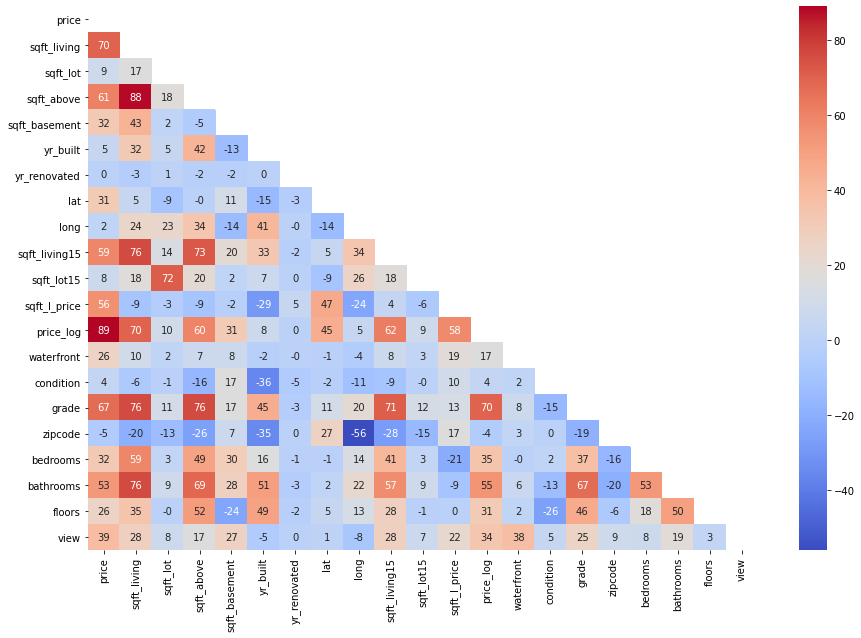

In [14]:
fig, ax = plt.subplots(figsize=(15,10))


df_dum = pd.get_dummies(df[continuous_var+categorical_var].copy())
mask = np.triu(df_dum.corr())
ax = sns.heatmap(round(df_dum.corr()*100,0)
                 ,annot=True
                 ,mask=mask
                 ,cmap="coolwarm")
                 
plt.savefig('figures/correlogram.png')

## Get dummies

In [15]:
categorical_var

['waterfront',
 'condition',
 'grade',
 'zipcode',
 'bedrooms',
 'bathrooms',
 'floors',
 'view']

In [16]:
df[categorical_var] = df[categorical_var].astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
price            21597 non-null float64
bedrooms         21597 non-null object
bathrooms        21597 non-null object
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null object
waterfront       21597 non-null object
view             21597 non-null object
condition        21597 non-null object
grade            21597 non-null object
sqft_above       21597 non-null int64
sqft_basement    21597 non-null float64
yr_built         21597 non-null int64
yr_renovated     21597 non-null int64
zipcode          21597 non-null object
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
sqft_l_price     21597 non-null float64
price_log        21597 non-null float64
dtypes: float64(6), int64(7), object(8)
memory usage: 3.5+ MB


In [17]:
X = pd.get_dummies(df.copy(), drop_first=True)

X.drop("price",        axis=1, inplace=True)
X.drop("price_log",        axis=1, inplace=True)
X.drop("sqft_l_price", axis=1, inplace=True)

y = df["price"]
y_loc = df["price_log"]

In [18]:
y_loc.head()

0    12.309982
1    13.195614
2    12.100712
3    13.311329
4    13.142166
Name: price_log, dtype: float64

## Linear regression model

### Sklearn LinearRegression on price label

In [19]:
from sklearn.model_selection import train_test_split
# price
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_predictions = lin_reg.predict(X_test)

In [21]:
print(f"RMSE: {round(mean_squared_error(y_test, y_predictions)**0.5,3)} Dollar")
print(f"RMSE:     {round((mean_squared_error(y_test, y_predictions)**0.5)/np.mean(y_test)*100,2)} %")
print(f"R2:       {round(r2_score(y_test, y_predictions)*100,3)}%")

RMSE: 138170.908 Dollar
RMSE:     25.9 %
R2:       83.782%


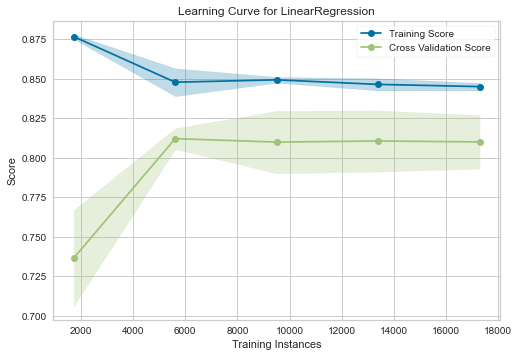

<AxesSubplot:title={'center':'Learning Curve for LinearRegression'}, xlabel='Training Instances', ylabel='Score'>

In [22]:
from yellowbrick.model_selection import LearningCurve

model = LinearRegression()
visualizer = LearningCurve(model, scoring='r2')

visualizer.fit(X, y)
visualizer.show()

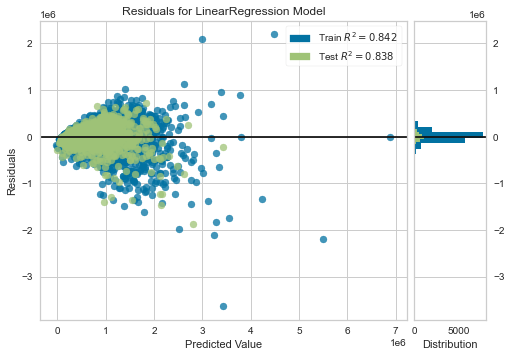

<AxesSubplot:title={'center':'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [23]:
from yellowbrick.regressor import ResidualsPlot

visualizer = ResidualsPlot(LinearRegression())
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

### Lasso Regression  on price label

In [24]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [25]:
lasso = Lasso()

# price
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

# looking for the right parameter
parameters = {"alpha": [50,100,200,500,1000]} #1st try
parameters = {"alpha": [200,250]}             #2nd try
parameters = {"alpha": [200,210,220]}         #3rd try
parameters = {"alpha": [200]}                 #done

# grid search
lasso_regressor = GridSearchCV(lasso, parameters, scoring="neg_mean_squared_error", cv=5)

In [26]:
lasso_regressor.fit(X_train, y_train)
y_predictions_lasso = lasso_regressor.predict(X_test)

In [27]:
print(lasso_regressor.best_params_)
print(round(lasso_regressor.best_score_,2))
print(f"LassoReg RMSE: {np.round(mean_squared_error(y_test, y_predictions_lasso)**.5,2)}")
print(f"LassoReg RMSE:     {round((mean_squared_error(y_test, y_predictions_lasso)**0.5)/np.mean(y_test)*100,2)} %")
print(f"LassoReg R2:       {round(r2_score(y_test, y_predictions_lasso),3)*100} %")  

{'alpha': 200}
-24469090471.84
LassoReg RMSE: 138579.65
LassoReg RMSE:     25.98 %
LassoReg R2:       83.7 %


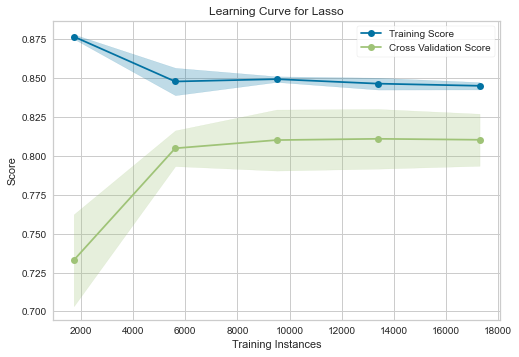

<AxesSubplot:title={'center':'Learning Curve for Lasso'}, xlabel='Training Instances', ylabel='Score'>

In [28]:
from yellowbrick.model_selection import LearningCurve

model = Lasso()
visualizer = LearningCurve(model, scoring='r2')

visualizer.fit(X, y)
visualizer.show()  

### Sklearn LinearRegression on price_loc label

In [29]:
# split
X_train, X_test, y_train, y_test = train_test_split(X,y_loc, test_size = 0.2, random_state = 0)

# train
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# test
y_train_predict = lin_reg.predict(X_train)
y_test_predict = lin_reg.predict(X_test)

# re transforming
y_train_predict = np.exp(y_train_predict)
y_train = np.exp(y_train)
y_test_predict = np.exp(y_test_predict)
y_test = np.exp(y_test)

In [30]:
# metrics
RMSE_train = np.round(mean_squared_error(y_train, y_train_predict)**0.5,2)
RMSE_test = np.round(mean_squared_error(y_test, y_test_predict)**0.5,2)

R2_train = np.round(r2_score(y_train, y_train_predict),2)
R2_test = np.round(r2_score(y_test, y_test_predict),2)

# output
print(f"R2-Score for Training Set is: {R2_train*100}%")
print(f"R2-Score for Test Set is:     {R2_test*100}%")
print(f"RMSE for Training Set is: {RMSE_train} Dollar")
print(f"RMSE for Test Set is:     {RMSE_test} Dollar")

R2-Score for Training Set is: 87.0%
R2-Score for Test Set is:     88.0%
RMSE for Training Set is: 133074.62 Dollar
RMSE for Test Set is:     116942.21 Dollar


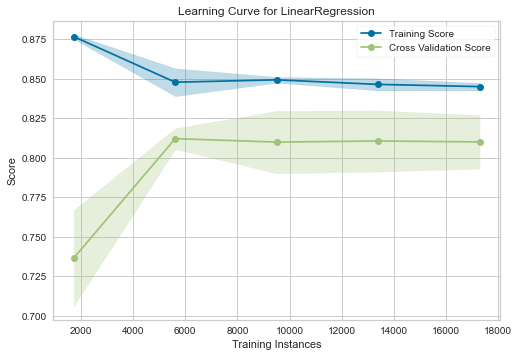

<AxesSubplot:title={'center':'Learning Curve for LinearRegression'}, xlabel='Training Instances', ylabel='Score'>

In [31]:
#visual
model = LinearRegression()
visualizer = LearningCurve(model, scoring='r2')
visualizer.fit(X, y)
visualizer.show()

#### Learning Curve Plot Function

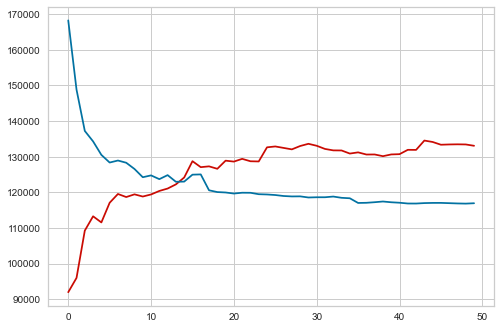

In [32]:
# learning curve function
def plot_learning_curves(model,X,y):
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)
    train_errors, test_errors = [],[]
    training_sizes = np.linspace(len(X_train)/50, len(X_train), num = 50)
    training_sizes = training_sizes.astype(int)
    for m in training_sizes:
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = np.exp(model.predict(X_train[:m]))
        y_test_predict = np.exp(model.predict(X_test))
        train_errors.append(mean_squared_error(y_train_predict, np.exp(y_train[:m])))
        test_errors.append(mean_squared_error(y_test_predict, np.exp(y_test)))
    plt.plot(np.sqrt(train_errors), "r-", label = "Training Set")
    plt.plot(np.sqrt(test_errors), "b-", label = "Test Set")  

plot_learning_curves(lin_reg, X,y_loc)

### Statsmodel OLS on price_loc label

In [33]:
# split
X_train, X_test, y_train, y_test = train_test_split(X,y_loc, test_size = 0.2, random_state = 0)

# add constant important for this model
X_train = sms.add_constant(X_train)

model = sms.OLS(y_train, X_train)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                     934.4
Date:                Wed, 30 Sep 2020   Prob (F-statistic):               0.00
Time:                        16:45:26   Log-Likelihood:                 5124.2
No. Observations:               17277   AIC:                            -9966.
Df Residuals:                   17136   BIC:                            -8873.
Df Model:                         140                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -61.8809      7.729     -8.006      0.000     -77.031     -46.730
sqft_living        0.0001   1.76e-05      7.781      0.000       0.000       0.000
sqft_lot        6.219e-07   4.94e-08     12.580      0.000    5.25e-07    7.19e-07
sqft_above       7.95e-05   1.77e-05      4.483      0.000    4.47e-05       0.000
sqft_basement  -6.798e-08   1.74e-05     -0.004      0.997   -3.43e-05    3.41e-05
yr_built          -0.0008   8.46e-05     -9.775      0.000      -0.001      -0.001
yr_renovated    5.635e-06   3.12e-07     18.058      0.000    5.02e-06    6.25e-06
lat                0.5222      0.079      6.587      0.000       0.367       0.678
long              -0.4059      0.057     -7.072      0.000      -0.518      -0.293
sqft_living15   7.249e-05    3.7e-06     19.615      0.000    6.52e-05    7.97e-05
sqft_lot15      7.958e-08   7.52e-08      1.058      0.290   -6.79e-08    2.27e-07
bedrooms_10.0     -0.1704      0.108     -1.584      0.113      -0.381       0.040
bedrooms_2.0       0.0287      0.016      1.809      0.070      -0.002       0.060
bedrooms_3.0       0.0464      0.016      2.923      0.003       0.015       0.078
bedrooms_4.0       0.0473      0.016      2.918      0.004       0.016       0.079
bedrooms_5.0       0.0167      0.017      0.977      0.329      -0.017       0.050
bedrooms_6.0      -0.0091      0.020     -0.446      0.656      -0.049       0.031
bedrooms_7.0      -0.1352      0.038     -3.579      0.000      -0.209      -0.061
bedrooms_8.0      -0.0543      0.058     -0.930      0.353      -0.169       0.060
bedrooms_9.0      -0.0386      0.093     -0.415      0.678      -0.221       0.144
bedrooms_nan       0.1681      0.182      0.926      0.355      -0.188       0.524
bathrooms_0.75     0.1972      0.094      2.094      0.036       0.013       0.382
bathrooms_1.0      0.1902      0.091      2.099      0.036       0.013       0.368
bathrooms_1.25     0.2266      0.111      2.041      0.041       0.009       0.444
bathrooms_1.5      0.2120      0.091      2.336      0.020       0.034       0.390
bathrooms_1.75     0.2484      0.091      2.738      0.006       0.071       0.426
bathrooms_2.0      0.2447      0.091      2.697      0.007       0.067       0.423
bathrooms_2.25     0.2738      0.091      3.016      0.003       0.096       0.452
bathrooms_2.5      0.2836      0.091      3.125      0.002       0.106       0.461
bathrooms_2.75     0.2946      0.091      3.241      0.001       0.116       0.473
bathrooms_3.0      0.2930      0.091      3.219      0.001       0.115       0.471
bathrooms_3.25     0.3172      0.091      3.479      0.001       0.139       0.496
bathrooms_3.5      0.3104      0.091      3.406      0.001       0.132       0.489
bathrooms_3.75     0.3353      0.092      3.633      0.000       0.154       0.516
bathrooms_4.